## What is Feature Engineering

Data comes in many formats: raw, unstructured, bad, incomplete, or large. Therefore, transformations and procedures are needed to get actionable data to model, analyze, or get insights for a business unit.

<img src='mental_map.png'/>

After we have the raw data into a tidy standard, we can then start performing feature engineering. A feature is known to be a variable or a characteristic of the observation we want to model or analyze.

## Why Python?

<img src='intro.png'/>

## Anaconda Distribution

<img src='conda_envs.png'/>

## Loading Libraries

In [1]:
import numpy as np
import pandas as pd

## Import Data

In [2]:
rating = pd.read_csv('restaurant-data-with-consumer-ratings/rating_final.csv')
users = pd.read_csv('restaurant-data-with-consumer-ratings/userprofile.csv')

In [3]:
print('Rating dataset shape:', rating.shape)
rating.head()

Rating dataset shape: (1161, 5)


,userID,placeID,rating,food_rating,service_rating
0,U1077,135085,2,2,2
1,U1077,135038,2,2,1
2,U1077,132825,2,2,2
3,U1077,135060,1,2,2
4,U1068,135104,1,1,2


In [4]:
print('Users dataset shape:', users.shape)
users.head()

Users dataset shape: (138, 19)


,userID,latitude,longitude,smoker,drink_level,dress_preference,ambience,transport,marital_status,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1001,22.139997,-100.978803,false,abstemious,informal,family,on foot,single,independent,1989,variety,thrifty-protector,none,student,black,69,medium,1.77
1,U1002,22.150087,-100.983325,false,abstemious,informal,family,public,single,independent,1990,technology,hunter-ostentatious,Catholic,student,red,40,low,1.87
2,U1003,22.119847,-100.946527,false,social drinker,formal,family,public,single,independent,1989,none,hard-worker,Catholic,student,blue,60,low,1.69
3,U1004,18.867000,-99.183000,false,abstemious,informal,family,public,single,independent,1940,variety,hard-worker,none,professional,green,44,medium,1.53
4,U1005,22.183477,-100.959891,false,abstemious,no preference,family,public,single,independent,1992,none,thrifty-protector,Catholic,student,black,65,medium,1.69


In [5]:
df = rating.merge(users, how = 'left', on = 'userID')

In [6]:
print('Final dataset shape:', df.shape)
df.head()

Final dataset shape: (1161, 23)


,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
1,U1077,135038,2,2,1,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
2,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
3,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
4,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57


## 1. Missing Data

A review of techniques for treating missing data in OM survey research

by Nikos Tsikriktsis

<img src='paper.png'/>

### Dealing with missing data

Finding NAs in the dataset

In [7]:
df.isna().sum() #or df.isnull().sum()

userID              0
placeID             0
rating              0
food_rating         0
service_rating      0
latitude            0
longitude           0
smoker              0
drink_level         0
dress_preference    0
ambience            0
transport           0
marital_status      0
hijos               0
birth_year          0
interest            0
personality         0
religion            0
activity            0
color               0
weight              0
budget              0
height              0
dtype: int64

In [8]:
np.unique(df['smoker'])

array(['?', 'false', 'true'], dtype=object)

In [9]:
cols = []
val = []
for col in df.select_dtypes(include='object').columns:
    cols.append(col)
    val.append(df[col].str.contains(r'\?').sum())
pd.DataFrame({
    'cols':cols,
    'val':val
})

,cols,val
0,userID,0
1,smoker,31
2,drink_level,0
3,dress_preference,51
4,ambience,58
5,transport,54
6,marital_status,40
7,hijos,98
8,interest,0
9,personality,0


We need to change the **?** into a **NaN** value

In [10]:
df.replace(r'\?', np.nan, regex = True, inplace = True)

Checking again for missing values

In [11]:
df.isna().sum()

userID               0
placeID              0
rating               0
food_rating          0
service_rating       0
latitude             0
longitude            0
smoker              31
drink_level          0
dress_preference    51
ambience            58
transport           54
marital_status      40
hijos               98
birth_year           0
interest             0
personality          0
religion             0
activity            53
color                0
weight               0
budget              69
height               0
dtype: int64

### 1.1 Deletion

### Listwise

<img src='listwise.png'/>

In [12]:
df.dropna().shape

(997, 23)

### Pairwise

<img src='corr.png'/>

In [13]:
df.corr()

,placeID,rating,food_rating,service_rating,latitude,longitude,birth_year,weight,height
placeID,1.000000,0.073768,0.011680,0.059236,-0.226728,-0.212708,-0.065294,-0.169660,-0.090682
rating,0.073768,1.000000,0.714855,0.690757,-0.122537,-0.046466,-0.134949,-0.069134,0.017379
food_rating,0.011680,0.714855,1.000000,0.647177,-0.068943,-0.007731,-0.122824,-0.036307,0.013336
service_rating,0.059236,0.690757,0.647177,1.000000,-0.083278,-0.053349,-0.122814,-0.034898,0.031252
latitude,-0.226728,-0.122537,-0.068943,-0.083278,1.000000,-0.332118,0.199679,0.107755,0.052327
longitude,-0.212708,-0.046466,-0.007731,-0.053349,-0.332118,1.000000,-0.056088,0.151532,0.024248
birth_year,-0.065294,-0.134949,-0.122824,-0.122814,0.199679,-0.056088,1.000000,0.189881,0.292179
weight,-0.169660,-0.069134,-0.036307,-0.034898,0.107755,0.151532,0.189881,1.000000,0.500988
height,-0.090682,0.017379,0.013336,0.031252,0.052327,0.024248,0.292179,0.500988,1.000000


In [14]:
df[['rating', 'food_rating']].corr()

,rating,food_rating
rating,1.000000,0.714855
food_rating,0.714855,1.000000


### 1.2 Filling and dropping values

**Filling Values**

* Fill values with information available (time series for example)
* Nearest Neighbor Imputation (NNI) - surveys - distance minimization
* KNN models

**Advantages:** Not losing observations.

**Disadvantages:** Missing the target.

<img src='fill.png'/>

In [15]:
df.iloc[380:390]

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
380,U1115,135108,1,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
381,U1115,135069,1,0,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
382,U1115,132830,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
383,U1115,135070,1,1,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
384,U1115,135071,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
385,U1072,135000,0,0,0,18.868260,-99.212033,false,casual drinker,no preference,...,independent,1984,eco-friendly,thrifty-protector,Christian,student,red,50,medium,1.54
386,U1024,132834,1,1,1,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20
387,U1024,135106,1,1,1,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20
388,U1024,135042,1,2,1,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20
389,U1024,132825,1,1,0,22.154021,-100.976028,NaN,abstemious,NaN,...,NaN,1930,none,hard-worker,none,NaN,yellow,40,NaN,1.20


In [16]:
df.fillna(method='ffill').iloc[380:390]

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
380,U1115,135108,1,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
381,U1115,135069,1,0,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
382,U1115,132830,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
383,U1115,135070,1,1,1,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
384,U1115,135071,2,2,2,22.138127,-100.920512,true,social drinker,elegant,...,independent,1990,variety,hard-worker,Catholic,student,green,76,low,1.76
385,U1072,135000,0,0,0,18.868260,-99.212033,false,casual drinker,no preference,...,independent,1984,eco-friendly,thrifty-protector,Christian,student,red,50,medium,1.54
386,U1024,132834,1,1,1,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20
387,U1024,135106,1,1,1,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20
388,U1024,135042,1,2,1,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20
389,U1024,132825,1,1,0,22.154021,-100.976028,false,abstemious,no preference,...,independent,1930,none,hard-worker,none,student,yellow,40,medium,1.20


Now, for dropping a column, we can choose a threshold. If % of NAs are higher than the threshold then we remove the column.

In [17]:
pct = pd.DataFrame(df.isna().sum()/df.shape[0], columns = ['pct']).reset_index()
pct

,index,pct
0,userID,0.000000
1,placeID,0.000000
2,rating,0.000000
3,food_rating,0.000000
4,service_rating,0.000000
5,latitude,0.000000
6,longitude,0.000000
7,smoker,0.026701
8,drink_level,0.000000
9,dress_preference,0.043928


**Dropping Values**

* Dropping features lower than a threshold (70% for example)

**Advantages:** Not using features with many NA. Can alter our model.

**Disadvantages:** Losing information

In [18]:
threshold = 0.70
cols_keep = pct[pct['pct']<threshold]['index'].values
cols_keep

array(['userID', 'placeID', 'rating', 'food_rating', 'service_rating',
       'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'marital_status',
       'hijos', 'birth_year', 'interest', 'personality', 'religion',
       'activity', 'color', 'weight', 'budget', 'height'], dtype=object)

In [19]:
df[cols_keep]

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,smoker,drink_level,dress_preference,...,hijos,birth_year,interest,personality,religion,activity,color,weight,budget,height
0,U1077,135085,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
1,U1077,135038,2,2,1,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
2,U1077,132825,2,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
3,U1077,135060,1,2,2,22.156469,-100.985540,false,social drinker,elegant,...,kids,1987,technology,thrifty-protector,Catholic,student,blue,65,medium,1.71
4,U1068,135104,1,1,2,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,U1043,132630,1,1,1,23.771030,-99.167082,false,abstemious,no preference,...,independent,1989,technology,hard-worker,none,student,white,60,medium,1.64
1157,U1011,132715,1,1,0,23.724972,-99.152856,false,abstemious,no preference,...,independent,1989,variety,hard-worker,Catholic,student,purple,68,medium,1.78
1158,U1068,132733,1,1,0,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57
1159,U1068,132594,1,1,1,23.752269,-99.168605,false,casual drinker,informal,...,independent,1988,technology,thrifty-protector,Catholic,student,blue,72,low,1.57


### 1.3 Imputations

* Mean: maintains the average of each feature
* Mode: most repeated value (stats change)
* Median: median value (stats change)
* Constant: Adding a constant to all missing values (stats changes but functions become available without na.rm)

There are some ways of imputing a variable. Some of them are:
* Base python: finding NAs and then assign a forced value (mean, median, constant)
* scipy: finding NAs and then assign a forced value (mode: categorical)
* sklearn: apply sklearn function with a specific strategy

Base python

In [20]:
df[df['weight'].isna()]['weight'] = df['weight'].mean()

Scipy

In [21]:
from scipy import stats

In [22]:
stats.mode(df['smoker'])

ModeResult(mode=array(['false'], dtype=object), count=array([907]))

Sklearn

In [23]:
from sklearn.impute import SimpleImputer

In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [25]:
imp_mean.fit_transform(df[['weight']])

array([[65.],
       [65.],
       [65.],
       ...,
       [72.],
       [72.],
       [72.]])

In [26]:
imp_mode.fit_transform(df[['smoker']])

array([['false'],
       ['false'],
       ['false'],
       ...,
       ['false'],
       ['false'],
       ['false']], dtype=object)

Now, if we want sectorized imputations, we need to create a **dictionary** or use **pd.cut()** function

* Using mean/mode/median or 0 imputation by feature.
* Mode is needed for categorical features

Disadvantage: Data is now highly biased

In [27]:
#For Smokers by Drink Level and Personality
dic_smoker = pd.DataFrame(df.groupby(['drink_level', 'personality'])['smoker'].agg(lambda x:x.value_counts().index[0])) \
    .reset_index()
dic_smoker.columns = ['drink_level', 'personality', 'smoker_new']
dic_smoker

,drink_level,personality,smoker_new
0,abstemious,conformist,false
1,abstemious,hard-worker,false
2,abstemious,hunter-ostentatious,false
3,abstemious,thrifty-protector,false
4,casual drinker,conformist,true
5,casual drinker,hard-worker,false
6,casual drinker,hunter-ostentatious,false
7,casual drinker,thrifty-protector,false
8,social drinker,conformist,true
9,social drinker,hard-worker,false


In [28]:
df = df.merge(dic_smoker, how = 'left', on = ['drink_level', 'personality'])
df['smoker_new_2'] = np.where(df['smoker'].isna(), df['smoker_new'], df['smoker'])

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

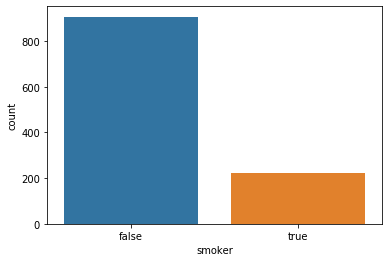

In [30]:
sns.countplot(df[df['smoker'].notna()]['smoker'])

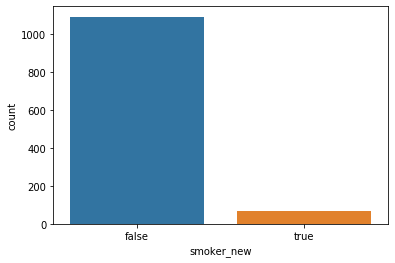

In [31]:
sns.countplot(df['smoker_new'])

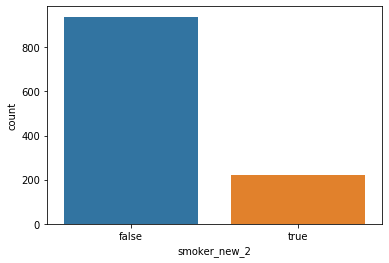

In [32]:
sns.countplot(df['smoker_new_2'])

### 1.4 Predictive Models

Predictive models are used to choose the best approximation for a missing value.

Numerical features:
* Linear regression
* Multidimensional regression

Categorial features:
* K-Nearest neighbors (KNN)
* Support vector machines (SVM)
* Logistic regression


***Linear Model Example***

<img src='lm.png'/>

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
lm = LinearRegression()
lm = lm.fit(df[['height']], df['weight'])
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
df['weight_lm'] = lm.predict(df[['height']])

Weight avg without prediction: 63.24


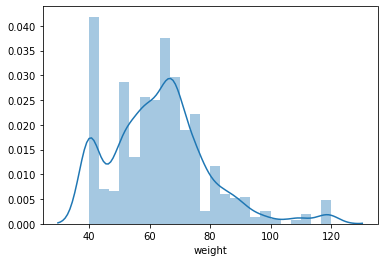

In [36]:
print('Weight avg without prediction:', round(df['weight'].mean(),2))
sns.distplot(df['weight'])

Weight avg after prediction: 63.24
y_hat = -36.57 + 60.03x


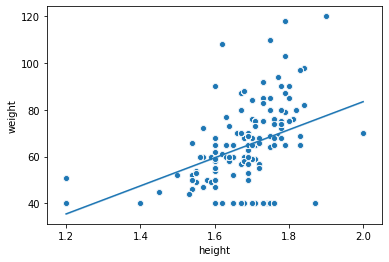

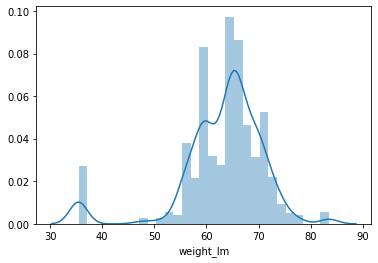

In [37]:
print('Weight avg after prediction:', round(df['weight_lm'].mean(),2))
print('y_hat = ', round(lm.intercept_,2), ' + ', round(lm.coef_[0],2), 'x', sep = '')
sns.scatterplot(x = df['height'], y = df['weight'])
sns.lineplot(x = df['height'], y = lm.intercept_ + (lm.coef_ * df['height']))
plt.ylabel('weight')
plt.show()
sns.distplot(df['weight_lm'])
plt.show()